# 图像去噪

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
src = cv2.imread('../datas/f4.jpg')
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)

In [3]:
def noise_gaussian(M,N,a = 0,b=1):
    R = a + b * np.random.randn(M,N)
    return R

In [9]:
rows,cols = rgb.shape[0],rgb.shape[1]
noise = noise_gaussian(rows,cols,a=0,b=0.1)
rgb_noise = np.zeros(rgb.shape,dtype=np.float64)

rgb_noise[:,:,0] = np.float64(rgb[:,:,0]) + noise * 255
rgb_noise[:,:,1] = np.float64(rgb[:,:,1]) + noise * 255
rgb_noise[:,:,2] = np.float64(rgb[:,:,2]) + noise * 255

rgb_noise[rgb_noise < 0] = 0
rgb_noise[rgb_noise > 255] = 255
rgb_noise = rgb_noise.astype(np.uint8)

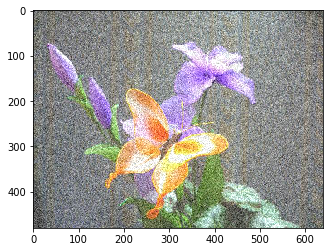

In [10]:
plt.imshow(rgb_noise)

In [11]:
dst = cv2.fastNlMeansDenoisingColored(rgb_noise,30,30,7,21)

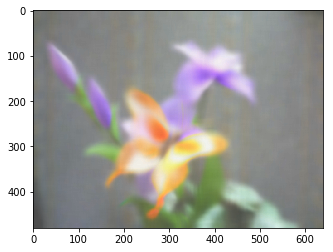

In [12]:
plt.imshow(dst)